In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style()

sns.set_context("notebook", font_scale=1.5)

In [33]:
boundaries_points = pd.read_csv('CoordinatesData/IrrigationAreasPoints.csv').values

****
## Map
****

We used the [GovMap]([https://www.govmap.gov.il/) website with the [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer/) in order to get the coordinate data of our plot which is according to this plot:

Then from the contour lines of altitude in the original map we sample points of 160, 165, 170 and 175 to interpolate all of the coordinate values

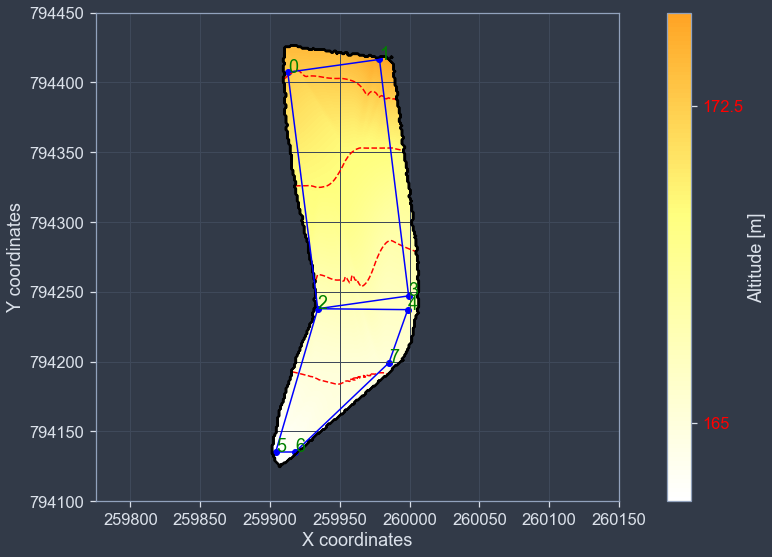

In [36]:
from scipy.interpolate import griddata
x = np.load('CoordinatesData/x.npy')
y = np.load('CoordinatesData/y.npy')
z = np.load('CoordinatesData/z.npy')
out_of_bound_i = np.argwhere(z == 0)

valued_z = []
valued_xy = []
for contour_value in [160,165,170,175]:
    data = pd.read_csv('AltitudeData/{}contour.csv'.format(contour_value))
    for instance in data.values:
        valued_xy.append(instance)
        valued_z.append(contour_value)
valued_z = np.array(valued_z)
valued_xy = np.array(valued_xy)

fig, axis = plt.subplots(figsize=(15,8))
xy = np.c_[x.flatten(),y.flatten()]
altitude = griddata(valued_xy, valued_z, xy, 'cubic').reshape(z.shape)
altitude[out_of_bound_i[:,0],out_of_bound_i[:,1]] = np.nan
cs_contourf = plt.contourf(x,y,altitude,1000, cmap='afmhot_r',vmax=190)
clabel = plt.contour(x,y,altitude,[165,167.5,170,172.5],
                     colors='red',
                     linestyles='dashed')
plt.ticklabel_format(useOffset=False)

cbar = fig.colorbar(cs_contourf,ticks=[165,172.5])
cbar.ax.set_yticklabels([165,172.5],color='red')
cbar.set_label('Altitude [m]')

plt.contour(x, y, z,colors='black', linewidths =1.5)
plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')
plt.tight_layout()
axis.set_aspect('equal', 'box')
plt.ylim(794100,794450)
plt.xlim(259775,260150)

#plt.savefig('map.png')
points_i = np.arange(0,len(boundaries_points))
for point,i in zip(boundaries_points,points_i):
    plt.scatter(point[0],point[1],c='blue')
    plt.annotate(str(i), (point[0],point[1]), c='green')
    
def plot_line(indices):
    i1,i2 = indices
    points = boundaries_points[[i1,i2]]
    plt.plot(points[:,0], points[:,1], c='blue')
    
def calculate_distance(indices):
    i1,i2 = indices
    return np.sqrt(np.sum((boundaries_points.iloc[i2]-boundaries_points.iloc[i1]) ** 2))

for indices in [[0,1],[1,3],[3,2],[2,0],[2,4],[4,7],[7,6],[6,5],[5,2]]:
    plot_line(indices)

In [30]:
calculate_distance([0,2])

170.77606956476075

In [31]:
calculate_distance([0,1])

66.34185292468788